# Initial Data Exploration of the Danish Data from Sigmorphon 2017 tasks 1 and 2

In [1]:
import os

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Combine both sources into a dataset

In [2]:
df_1 = pd.read_csv("../data/sigmorphon2017/full-dataset/danish_2017_task1.txt", sep="\t", header=None)
df_2 = pd.read_csv("../data/sigmorphon2017/full-dataset/danish_2017_task2.txt", sep="\t", header=None)

danish_df = pd.concat([df_1, df_2])

# reset the index
danish_df.reset_index(drop=True, inplace=True)

# rename columns
danish_df.rename(columns={0: 'lemma', 1: 'inflected form', 2: 'PoS'}, inplace=True)

danish_df

,lemma,inflected form,PoS
0,godbid,godbid,N;INDF;NOM;SG
1,oversættelseslån,oversættelseslånenes,N;DEF;NOM;PL
2,stab,stabens,N;DEF;NOM;SG
3,blomkål,blomkål,N;INDF;NOM;SG
4,fællesbetegnelse,fællesbetegnelse,N;INDF;NOM;SG
...,...,...,...
11198,skuespiller,skuespillers,N;INDF;GEN;SG
11199,skuespiller,skuespillerens,N;DEF;NOM;SG
11200,skuespiller,skuespillere,N;INDF;NOM;PL
11201,skuespiller,skuespiller,N;INDF;NOM;SG


# Data exploration

## Frequency of lemmas

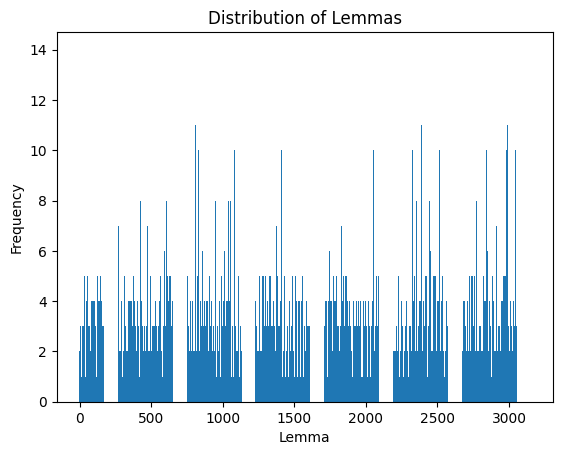

In [3]:
# Convert the first column of the DataFrame to a list of unique lemmas
lemmas = danish_df['lemma'].unique()

# Get the frequency of each lemma using value_counts
frequencies = danish_df['lemma'].value_counts().sort_index(ascending=False)

# Plot the frequencies
plt.bar(range(len(frequencies)), frequencies)
plt.xlabel('Lemma')
plt.ylabel('Frequency')
plt.title('Distribution of Lemmas')
plt.show()

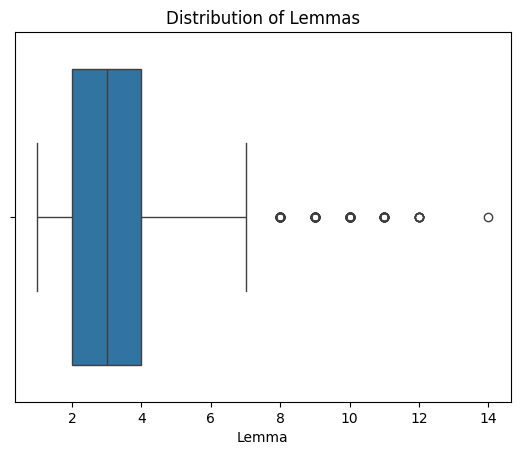

In [4]:
# Convert the first column of the DataFrame to a list of unique lemmas
lemmas = danish_df['lemma'].unique()

# Get the frequency of each lemma
freq = danish_df['lemma'].value_counts()

# Create a boxplot of the frequency of lemmas
sns.boxplot(x=freq)

# Add a title and labels
plt.title("Distribution of Lemmas")
plt.xlabel("Lemma")

# Show the plot
plt.show()

## Frequency of PoS tags

In [5]:
pos_tags_set = set()
pos_tags_list = []

for index, row in danish_df.iterrows():
    line_content = row["PoS"]
    tags = line_content.split(';')

    for tag in tags:
        pos_tags_set.add(tag)
        pos_tags_list.append(tag)

In [6]:
len(pos_tags_set)

16

In [7]:
import collections
import matplotlib.pyplot as plt

# Create a dictionary where each key is a string in the list and each value is its frequency
freq = collections.Counter(pos_tags_list)

# Sort the dictionary by frequency (highest to lowest)
sorted_freq = sorted(freq.items(), key=lambda x: x[1], reverse=True)
print(sorted_freq)


[('N', 10514), ('NOM', 7032), ('INDF', 6990), ('PL', 5303), ('SG', 5211), ('DEF', 3524), ('GEN', 3482), ('V', 520), ('ACT', 447), ('IND', 346), ('PRS', 258), ('PST', 257), ('PASS', 242), ('V.PTCP', 169), ('NFIN', 89), ('IMP', 85)]


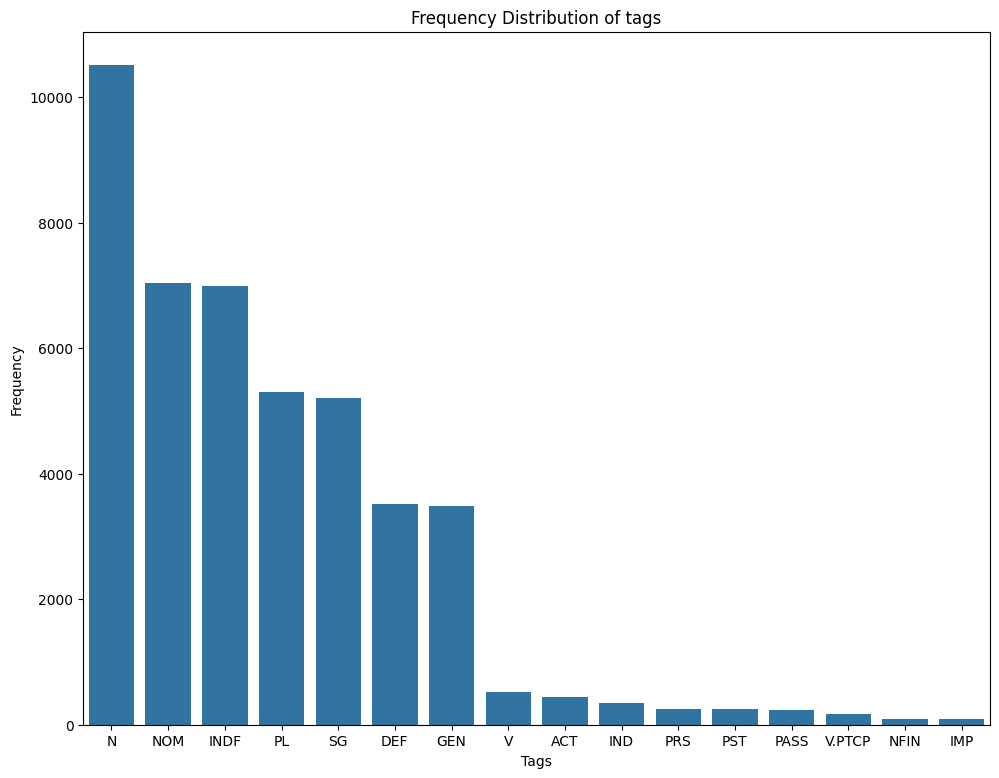

In [8]:
from matplotlib import rcParams

# figure size in inches
rcParams['figure.figsize'] = 11.7,9

# Load the data
tips = [freq[0] for freq in sorted_freq]
freqs = [freq[1] for freq in sorted_freq]

# Create a bar chart using Seaborn
sns.barplot(x=tips, y=freqs)

# Add a title and labels
plt.title("Frequency Distribution of tags")
plt.xlabel("Tags")
plt.ylabel("Frequency")

# Show the plot
plt.show()

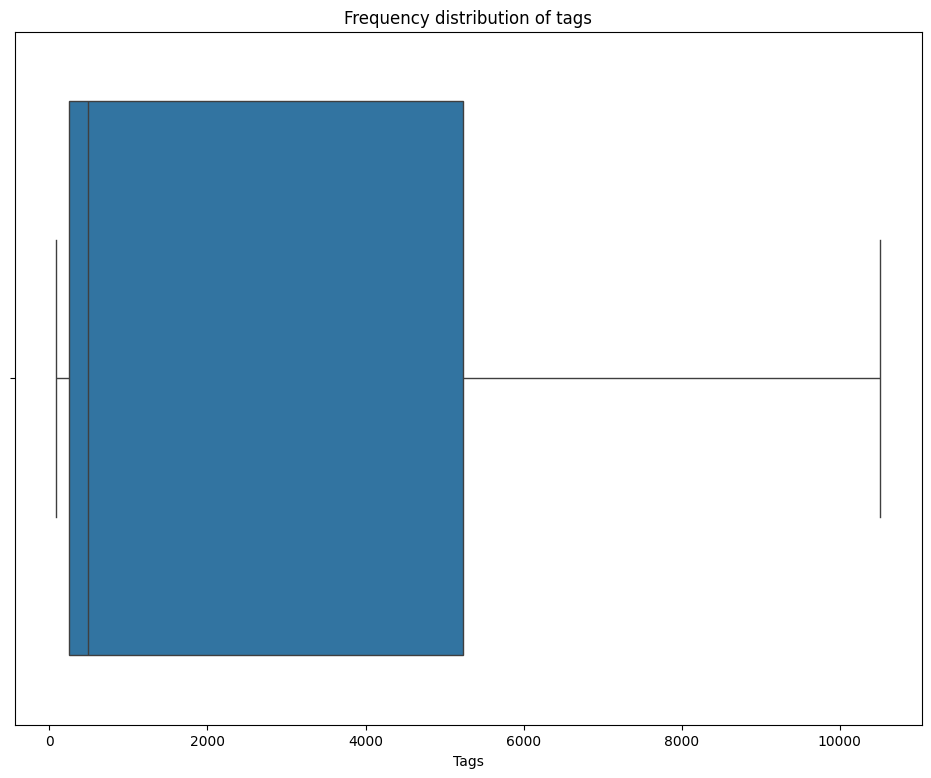

In [9]:
# Create a boxplot of the frequency of lemmas
sns.boxplot(x=freqs)

# Add a title and labels
plt.title("Frequency distribution of tags")
plt.xlabel("Tags")

# Show the plot
plt.show()